In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # ploting graph
import math

In [25]:
def sigmoid(z):
    # Takes input as z and return sigmoid of value
    s = 1 / (1 + math.exp(-z))
    return s

In [26]:
# generate data with two feature set and get label of XOR function
x1, x2 = 1, 1
y = int(np.logical_xor(x1,x2))
print('actual value(y): ', y)

# initialize parameters i.e. weights and bias with random values
w1, w2, b = 0.1, 0.5, 0.005
print('Parameters Before update')
print('w1: ', w1, 'w2: ', w2, 'b: ', b)
z = w1*x1 + w2*x2 + b

# activation of values
a = sigmoid(z) # Apply sigmoid activation function to z
print('activation value: ', a)

# compute the loss of the function (since we have training example equal to 1, so cost = loss)
cost = -1 * (y * np.log(a) + (1 - y) * (np.log(1 - a))) # compute cost
print('loss of function: ', cost)

# Store cost, activation, weights and bias to dictionary
my_dic = {}
my_dic['w1'] = w1
my_dic['w2'] = w2
my_dic['b'] = b
my_dic['activation'] = a
my_dic['cost'] = cost

actual value(y):  0
Parameters Before update
w1:  0.1 w2:  0.5 b:  0.005
activation value:  0.6467993925579857
loss of function:  1.0407190904293084


In [27]:
# BACKWARD PROPAGATION (TO FIND GRAD)
dw1 = x1*(a-y)
dw2 = x2*(a-y)
db = a - y 

In [28]:
# update parameter w1, w2 and b by these equations
lr =0.07 # learning rate
w1 = w1 - (lr * dw1) # Update values of w1, w2, b (Decremental update of each variable value, taking the learning rate `lr` into account)
w2 = w2 - (lr * dw2)
b = b - (lr * db)
z = w1*x1 + w2*x2 + b

# activation of values
a = sigmoid(z) # Apply sigmoid activation function
print('activation value before update: ', my_dic['activation'])
print('activation value after update: ', a)

# compute the loss of the function
cost = -1 * (y * np.log(a) + (1 - y) * (np.log(1 - a)))
print('loss of function before update: ', my_dic['cost'])
print('loss of function after update: ', cost)

activation value before update:  0.6467993925579857
activation value after update:  0.6151877913801179
loss of function before update:  1.0407190904293084
loss of function after update:  0.9549998335112363


In [29]:
def get_activation_loss(x1, x2, w1, w2, b):
    # this function compute activations, cost and z
        # x : input features
        # w : weight
        # b : bias
        
    z = w1*x1 + w2*x2 + b # z = np.dot(w.T, x) + b
    a = sigmoid(z)
    y = int(np.logical_xor(x1,x2))
    cost = -1 * (y * np.log(a) + (1 - y) * (np.log(1 - a))) # compute cost
    return (a, cost, z)

def update_paramters(x1, x2, w1, w2, b, a, y, lr):
    # This function computes gradient of parameters and then update them returns updated parameters weights and bias
        # x: input features
        # w: weights
        # b: bias
        # a: activation
        # y: actual label
        # lr: learning rate
        # BACKWARD PROPAGATION (TO FIND GRAD)
    dw1 = (a-y) * x1
    dw2 = (a-y) * x2
    db = (a-y)
    
    # Update parameters w1, w2 and b by these equations
    w2 = w2 - (lr * dw2)
    b = b - (lr * db)
    
    # Return the updated weights and bias
    return(w1, w2, b) 

# Define the plt_res function for plotting
def plt_res(data, title, lr):
    plt.plot(range(len(data)), data)
    plt.xlabel('Iteration')
    plt.ylabel(title)
    plt.title(f'{title} v/s Iteration (Learning Rate: {lr})')
    plt.show()

x1:  1 ; x2:  0
xor value(y):  1


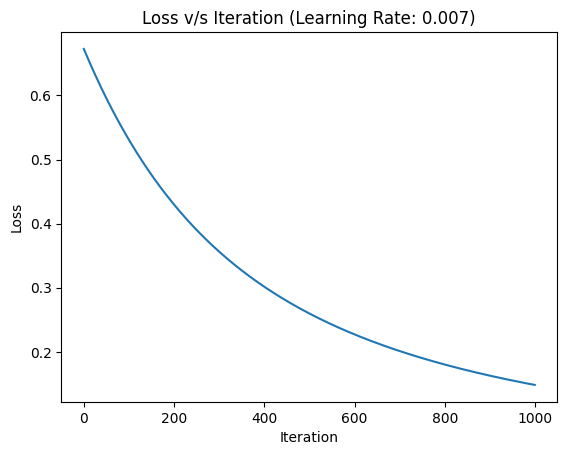

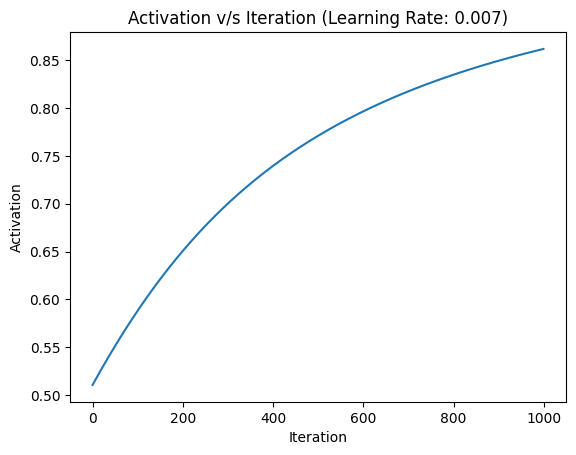

In [30]:
# initialize parameters i.e. weights and bias with random values
# to new random values 
w1, w2, b = 0.04, 0.75, 0.0015
lst_cost = []
lst_activation = []

# In code below, update parameters about 1000 or 2000 times
num_iter = 1000
lr = 0.007

# generate data with two feature set and get label
x1, x2 = 1, 0
y = int(np.logical_xor(0,1))
print ('x1: ', x1, '; x2: ',x2)
print('xor value(y): ', y)

for i in range(num_iter):
    a, cost, z = get_activation_loss(x1, x2, w1, w2, b)
    # print('cost at iteration', i,': ', cost)
    # print('activation at iteration', i,': ‘,a)
    w1, w2, b = update_paramters(x1, x2, w1, w2, b, a, y, lr)
    lst_cost.append(cost)
    lst_activation.append(a)
    
plt_res(lst_cost, 'Loss', lr)
plt_res(lst_activation,'Activation', lr) 

## Regularisation

In [31]:
# Evaluate a ridge regression model on the dataset
import numpy as np
from pandas import read_csv
import pandas as pd

# Load the dataset
url ='https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
input_df = read_csv(url, header = None)
# print(input_df)

data = input_df.values
X = data[0:35, 12] # choose one feature
y = data[0:35, 13] # target

<AxesSubplot: >

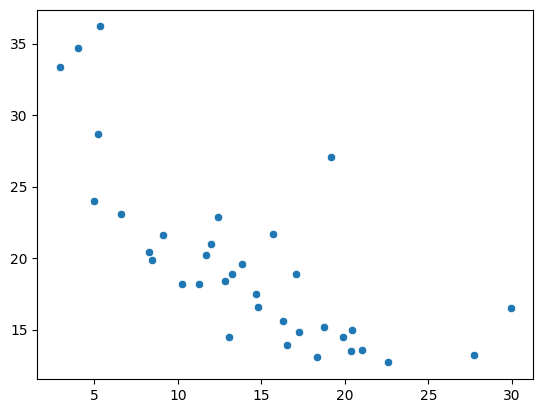

In [32]:
import seaborn as sns
sns.scatterplot(x=X, y=y)

### Simple Regression

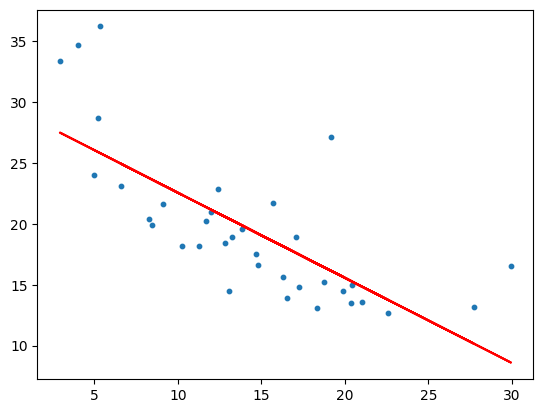

RMSE: 4.109901007971022
R2 score: 0.5397260819538162


In [33]:
# Simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]
lin_reg.fit(X_re, y_re)
y_pred = lin_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y,y_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

### Polynomial Regression

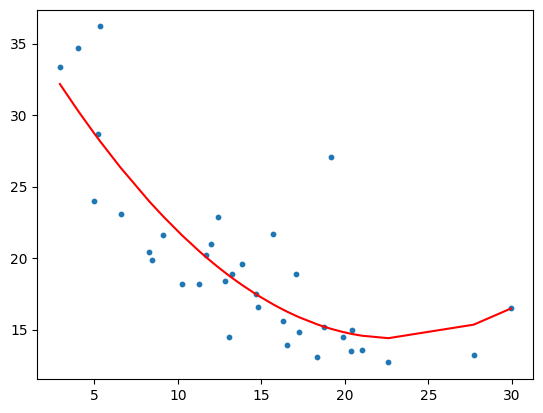

RMSE: 3.777547160595568
R2 score: 0.6111577631639971


In [34]:
# Polynomial regression
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# polynomial transformation
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_re)
lin_reg.fit(X_poly, y_re)
y_poly_pred = lin_reg.predict(X_poly)

# Plot fit over data:
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

### Ridge Regularization

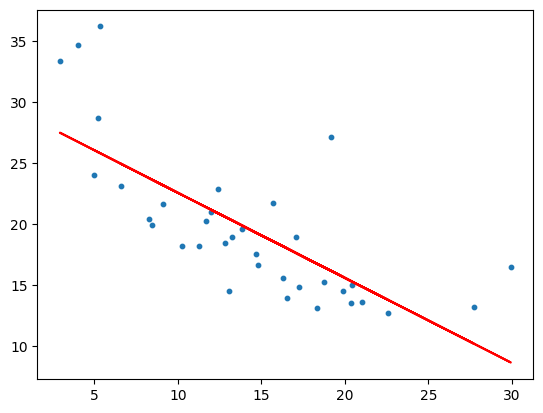

RMSE: 4.109902204828202
R2 score: 0.5397258138781507


In [35]:
# Model with ridge regularization
from sklearn.linear_model import Ridge

# Define model with alpha=1
ridge_reg = Ridge(alpha=1.0)

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

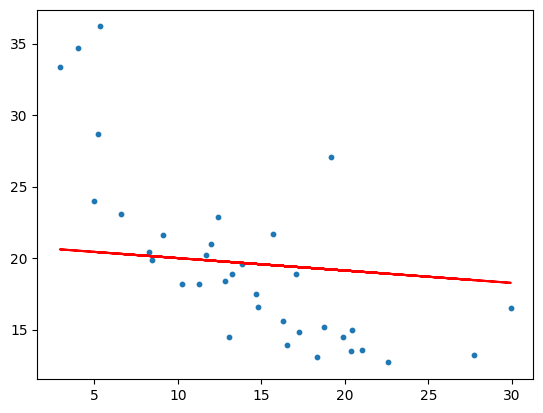

RMSE: 5.664306099570402
R2 score: 0.12572698850601627

Data mean is : 19.63714285714286


In [36]:
# Define model with very large alpha
ridge_reg = Ridge(alpha=10000)

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))
print("\nData mean is : " + str(np.mean(y_re)))

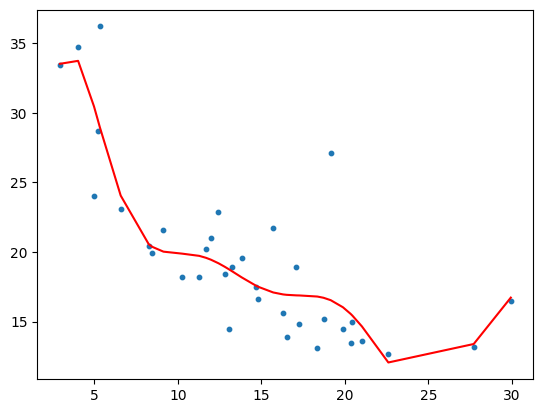

RMSE: 4.012833232123883
R2 score: 0.5612108646574561


In [37]:
# Reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# polynomial transformation
polynomial_features= PolynomialFeatures(degree=10)
X_poly = polynomial_features.fit_transform(X_re)

#----------
# Model without regularization
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_re)
y_poly_pred = lin_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

C:\Users\Savi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.05471e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


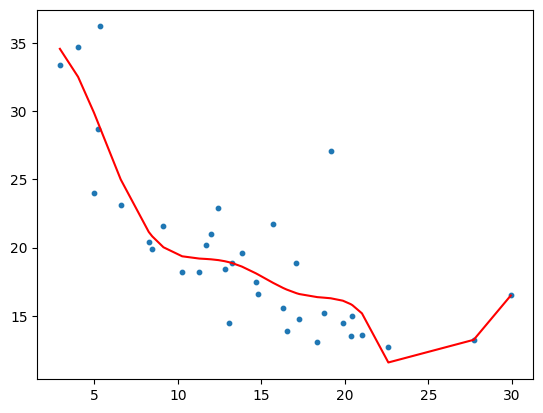

RMSE: 3.9182443351240352
R2 score: 0.5816529878590677


In [38]:
# Model with ridge regularization
from sklearn.linear_model import Ridge

# define model with alpha=xxx
ridge_reg = Ridge(alpha=10)

# fit ridge model
ridge_reg.fit(X_poly, y_re)

# predict y
y_ridge_poly_pred = ridge_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_ridge_poly_pred), key=sort_axis)
X_re_sort, y_ridge_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_ridge_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_poly_pred))
r2 = r2_score(y_re, y_ridge_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

C:\Users\Savi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.662e+02, tolerance: 1.284e-01
  model = cd_fast.enet_coordinate_descent(


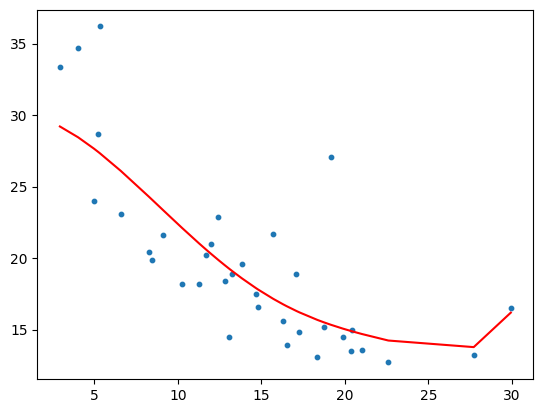

RMSE: 3.6695733053250223
R2 score: 0.6330686840294002


In [39]:
# Polynomial regression as before but using Lasso regularization
from sklearn.linear_model import Lasso

# define model with alpha=10
lasso_reg = Lasso(alpha=10)

# fit ridge model
lasso_reg.fit(X_poly, y_re)

# predict y
y_lasso_poly_pred = lasso_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_lasso_poly_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_lasso_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_lasso_poly_pred))
r2 = r2_score(y_re, y_lasso_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

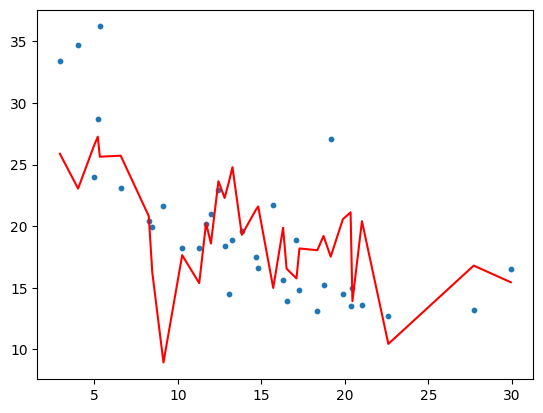

RMSE: 4.11201562278132
R2 score: 0.5392523223998349


In [40]:
from sklearn.linear_model import ElasticNet

# define elastic net model
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5) # Lasso 50 : 50 Ridge

# fit model
elastic_net.fit(X_re, y_re)

# predict y
y_elas_pred = elastic_net.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_elas_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_elas_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_elas_pred))
r2 = r2_score(y_re, y_elas_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

In [41]:
import pandas as pd

# Define a list of hyperparameter sets
hyperparameters = [
    {"alpha": 0.1, "l1_ratio": 0.2},
    {"alpha": 0.5, "l1_ratio": 0.5},
    {"alpha": 1.0, "l1_ratio": 0.7},
    {"alpha": 2.0, "l1_ratio": 0.8},
    {"alpha": 5.0, "l1_ratio": 0.9}
]

# Create empty lists to store RMSE and R2 score values
rmse_values = []
r2_values = []

# Loop through the set of hyperparameters
for params in hyperparameters:
    elastic_net = ElasticNet(alpha=params["alpha"], l1_ratio=params["l1_ratio"])
    elastic_net.fit(X_re, y_re)
    y_elas_pred = elastic_net.predict(X_re)
    
    rmse = np.sqrt(mean_squared_error(y_re, y_elas_pred))
    r2 = r2_score(y_re, y_elas_pred)
    
    rmse_values.append(rmse)
    r2_values.append(r2)

# Method 1 : Create a DataFrame to display the results
# results_df = pd.DataFrame({
#     "alpha": [params["alpha"] for params in hyperparameters],
#     "l1_ratio": [params["l1_ratio"] for params in hyperparameters],
#     "RMSE": rmse_values,
#     "R2 Score": r2_values
# })

# print(results_df)

# Method 2 : Use HTML
from IPython.display import HTML

# Create an HTML table
html_table = "<table>"
html_table += "<tr>"
html_table += "<th>Alpha</th>"
html_table += "<th>L1_Ratio</th>"
html_table += "<th>RMSE</th>"
html_table += "<th>R2 Score</th>"
html_table += "</tr>"

for i, params in enumerate(hyperparameters):
    html_table += "<tr>"
    html_table += f"<td>{params['alpha']}</td>"
    html_table += f"<td>{params['l1_ratio']}</td>"
    html_table += f"<td>{rmse_values[i]}</td>"
    html_table += f"<td>{r2_values[i]}</td>"
    html_table += "</tr>"

html_table += "</table>"

# Display the HTML table in the notebook
display(HTML(html_table))

Alpha,L1_Ratio,RMSE,R2 Score
0.1,0.2,4.109918256825852,0.5397222184959671
0.5,0.5,4.110436269015415,0.5396061847881042
1.0,0.7,4.112349385882335,0.5391775236496446
2.0,0.8,4.1202917110788855,0.5373957994007386
5.0,0.9,4.178247838248415,0.5242902670256572


# Exercise

In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [43]:
# 1.) Function to generate a dataset of desired length and width
def generate_dataset(rows, columns):
    data = np.random.randint(0, 2, size=(rows, columns))  # Generate random binary data
    return data

# 2.) XOR function to generate true labels
def xor_labels(data):
    labels = np.logical_xor.reduce(data, axis=1)  # Perform the XOR operation row-wise
    return labels.astype(int)  # Convert boolean labels to integers (0 or 1)

# 3.) Function to train and evaluate logistic regression model
def train_and_evaluate_logistic_regression(data, labels, hyperparameters):
    results = []
    for params in hyperparameters:
        
        # Create and fit the logistic regression model
        model = LogisticRegression(
            penalty = params['penalty'],
            C = params['C'],       
            l1_ratio = params['l1_ratio'],
            solver = params['solver'],
            max_iter = params['max_iter'],
        )
        model.fit(data, labels)
        
        # Predict labels
        predictions = model.predict(data)
        
        # Calculate accuracy, recall, and F1-score
        accuracy = accuracy_score(labels, predictions)
        recall = recall_score(labels, predictions)
        f1 = f1_score(labels, predictions)
        
        results.append({
            'Penalty': params['penalty'],
            'C': params['C'],
            'L1_ratio': params['l1_ratio'],
            'Solver': params['solver'],
            'Epochs': params['max_iter'],
            'Accuracy': accuracy,
            'Recall': recall,
            'F1-Score': f1
        })

    return results

In [44]:
# Generate a dataset with 100 rows and 4 features
num_rows = 100
num_features = 4
dataset = generate_dataset(num_rows, num_features)

# Generate true labels using XOR
true_labels = xor_labels(dataset)

# Define hyperparameters for logistic regression

# 1.) penalty : Regularization type -> 'l1' or 'l2' or 'elasticnet' (Using elasticnet for our case)
# 2.) C : Regularisation strength -> Higher C : weaker regularization (Inverse of alpha)
# 3.) l1_ratio : Mixing parameter for L1 and L2
# 4.) solver : Algorithm to use in the optimization problem -> 'saga' for Elastic Net (Recommended)
# 5.) max_iter : Maximum number of iterations

hyperparameters = [
    {'penalty': 'elasticnet', 'C': 0.01, 'l1_ratio': 0.3, 'solver': 'saga', 'max_iter': 100},
    {'penalty': 'elasticnet', 'C': 0.1, 'l1_ratio': 0.4, 'solver': 'saga', 'max_iter': 200},
    {'penalty': 'elasticnet', 'C': 1.0, 'l1_ratio': 0.5, 'solver': 'saga', 'max_iter': 300},
    {'penalty': 'elasticnet', 'C': 10.0, 'l1_ratio': 0.6, 'solver': 'saga', 'max_iter': 400},
    {'penalty': 'elasticnet', 'C': 100.0, 'l1_ratio': 0.7, 'solver': 'saga', 'max_iter': 500},
]

# Train and evaluate logistic regression with different hyperparameters
results = train_and_evaluate_logistic_regression(dataset, true_labels, hyperparameters)

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Display the results in a table
# print(results_df)
results_df.index += 1
results_df

,Penalty,C,L1_ratio,Solver,Epochs,Accuracy,Recall,F1-Score
1,elasticnet,0.01,0.3,saga,100,0.50,0.00,0.00
2,elasticnet,0.10,0.4,saga,200,0.50,0.00,0.00
3,elasticnet,1.00,0.5,saga,300,0.58,0.58,0.58
4,elasticnet,10.00,0.6,saga,400,0.58,0.58,0.58
5,elasticnet,100.00,0.7,saga,500,0.58,0.58,0.58
